In [1]:
import os,copy
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
import seaborn as sns

## parse cd-hit output, for each orthologous cluster, store the gene id for each var in a dict

(array([159.,   1.,   0.]), array([1, 2, 3, 4]), <a list of 3 Patch objects>)

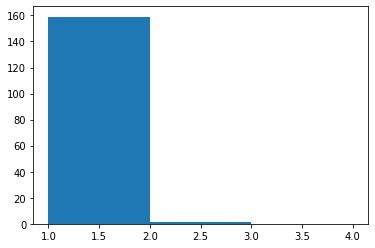

In [67]:
cd_hits='20vars_HLH_merged_30aa_uniqid_list.cd-hit.c95.clstr'
#cd_hits='20vars_HLH_merged_20aa_uniqid_list.cd-hit.c95.clstr' # use >20aa proteins

#setup empty cluster dict
cluster_dict={}
i=0 # count number of cluster

## setup var_dict for each cd-hit cluster, to store the presence absence of 20 varieties
var_ids='20var_id.txt'
var_dict={}
with open(var_ids,'r') as f:
    for line in f:
        var_dict[str(line.strip())]=[]

var_dict['absence'] = 0

## read cd-hit output, for each cluster, store gene ID in var_dict with 20 var_name as 20keys, store each cluster record(a dict)
# in cluster_dict using cluster name as key
with open(cd_hits,'r') as f2:
    for line in f2:
        if line.startswith(">"): # cluster id line
            i+=1 #count cluster
            if i==1: #first cluster no action
                cluster_name='C0'
                continue
            else: # other cluster, take following actions
                ##add last cluster record
                var_dict['absence']=sum(value == [] for value in var_dict.values()) ##count how many [] in var_dict
                cluster_dict[cluster_name]=copy.deepcopy(var_dict) ##add gene ids
                
                ##reset cluster_name and var_dict
                cluster_name='C'+str(line.strip().split()[1])
                
                ##clear var_dcit for next cluster
                var_dict.clear()
                var_dict={'CHIBA': [],
                          'PLANET': [],
                         'HHOR': [],
                         '9043': [],
                         'HOCKETT': [],
                         '8148': [],
                         '7552': [],
                         'BARKE': [],
                         '13942': [],
                         'GOLDEN': [],
                         'OUN333': [],
                         '3081': [],
                         'IGRI': [],
                         'MOREXr2': [],
                         '13821': [],
                         'AKASHIN': [],
                         '10350': [],
                         '21599': [],
                         'HUANG': [],
                         'FT11': [],
                         'absence':0}
        else: # gene id lines
            gene_id=line.split()[2][1:-3] # get gene id
            gene_varid=str(gene_id.split('_')[1]) # get varid from gene id
            var_dict[gene_varid].append(gene_id) # use varid as key, add gene id for each 20var
        
        ##add last record
        cluster_dict[cluster_name]=var_dict

#sum up absence number for each cluster
gene_absence_number = [cluster_dict[key]['absence'] for key in cluster_dict.keys()]
data1 = np.array(gene_absence_number)

#sum up number of Morex gene in each cluster
morex_gene_number = [len(cluster_dict[key]['MOREXr2']) for key in cluster_dict.keys()]
data2 = np.array(morex_gene_number)

#plot distribution
plt.hist(data2, bins=np.arange(1, 5))

# #duplicated Morex gene pairs in each cluster
# with open('morex_dup_group_pairs_info.txt','w') as f5:
#     f5.write('\t'.join(['ClusterName','AbsenceNo','GeneNo','Gene1','Gene2'])+'\n')
#     for key in cluster_dict.keys():
#         if len(cluster_dict[key]['MOREX']) >1 and len(cluster_dict[key]['MOREX']) < 21:
#             res = list(combinations(cluster_dict[key]['MOREX'], 2))
#             for tp in res:
#                 f5.write(key+'\t'+str(cluster_dict[key]['absence'])+'\t'+str(len(cluster_dict[key]['MOREX']))+'\t'+'\t'.join(list(tp))+'\n')


## Count newly annotated gene for each var

In [68]:
##count gene number for each variety
with open("bhlh_barley_pan_gene_count_sum.csv","w") as f:
    for var in list(var_dict.keys())[:-1]:
        i=0 #total gene count
        j=0 #new gene count
        for key in cluster_dict.keys():
            i+=len(cluster_dict[key][var]) # count gene number for cluster,var and add up to total gene
            for gene in cluster_dict[key][var]:
                if "HLH" in gene:
                    j+=1 # count new gene, and add up
        f.write(str(var)+"\t"+str(i)+"\t"+str(j)+"\n")

In [69]:
df = pd.read_csv("bhlh_barley_pan_gene_count_sum.csv",delimiter="\t",header=None)
df.columns = ["Variety","Total","Newly annotated"]
df["Annotated"] = df["Total"] - df["Newly annotated"]
df.head()

,Variety,Total,Newly annotated,Annotated
0,CHIBA,167,6,161
1,PLANET,170,5,165
2,HHOR,175,10,165
3,9043,176,9,167
4,HOCKETT,169,5,164


## >30aa

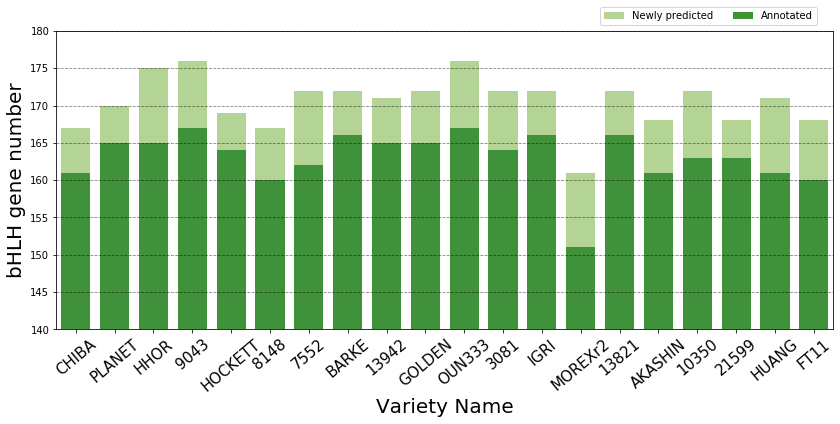

In [5]:
# ## orginal plt plot
# fig=plt.figure(figsize=(15,9), facecolor='white')
# #plt.axis((-1,22,5,9))
# plt.bar(df[1],df[0],width=0.4, color="royalblue")
# plt.axis("auto")
# plt.xticks(rotation=60,fontsize=15)
# plt.yticks(np.arange(0,200,step=5),fontsize=15)
# plt.xlabel("Variety Name",fontsize=20)
# plt.ylabel("bHLH gene number",fontsize=20)
# plt.ylim(150,180)
# plt.title("bHLH gene distribution")
# plt.grid(axis="y",color="black", linestyle="--")

## new seaborn bar plot
f, ax = plt.subplots(figsize=(12, 6),facecolor='white')

## picking colors
cols = sns.color_palette("Paired")

#plot total gene number
#sns.set_color_codes("pastel")
sns.barplot(x="Variety", y="Total", data=df,
            label="Newly predicted", color=cols[2]) # a trick to use total bar color to display newly annotated

#plot newly annotated
#sns.set_color_codes("muted")
sns.barplot(x="Variety", y="Annotated", data=df,
            label="Annotated", color=cols[3])

#figure formating
## change bar width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .75)

##add grid lines
plt.grid(axis="y",color="black", linestyle="--",alpha=0.5)

##ticks and labels
plt.xticks(rotation=40,fontsize=15)
plt.xlabel("Variety Name",fontsize=20)
plt.ylabel("bHLH gene number",fontsize=20)

##legend position
ax.legend(ncol=2, loc=(0.7,1.02), frameon=True)
ax.set(ylim=(140, 180))
#sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [6]:
# seaborn color palletes https://seaborn.pydata.org/tutorial/color_palettes.html
sns.color_palette("Paired")[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

In [7]:
f.savefig("bhlh_20pan_distribution.png",dpi=300)

## filter pan-genome reference genes

In [8]:
from Bio import SeqIO

In [9]:
#for each cluster, if Morex is present, use Morex; if Morex is absent, then use the longest sequence

#divide orthologous clusters into core and disposable categories
fasta = "20vars_HLH_merged_30aa_uniqid_list.fasta"

def LONGEST(gene_list):
    longest_gene = ''
    longest_len = 0
    for rec in SeqIO.parse(fasta,"fasta"):
        for gene in gene_list:
            if rec.id == gene and len(rec.seq)>longest_len:
                longest_gene = gene
                longest_len = len(rec.seq)
    return longest_gene, longest_len
                

with open("bhlh_cluster_reference_gene.csv","w") as f1:
    headers = ["cluster_name","total_gene_num","vars_num","morex_gene_num","reference_gene","reference_len","total_gene_id"]
    f1.write("\t".join(headers) + "\n")
    
    for cluster in cluster_dict.keys():
        cluster_gene_list=[] # reset empty list for a new cluster
        var_list = list(cluster_dict[cluster].keys())[:-1]
        
        for var in var_list: # get all gene id in list
            cluster_gene_list += cluster_dict[cluster][var]
        
        if cluster_dict[cluster]["MOREXr2"] == []: # find reference gene for each cluster
            morex_num = 0
            longest_id,seq_len = LONGEST(cluster_gene_list) # get longest gene id and its length
            
        else:
            morex_num = len(cluster_dict[cluster]["MOREXr2"])
            longest_id,seq_len = LONGEST(cluster_dict[cluster]["MOREXr2"]) # get longest gene id and its length
    
        lines = [cluster,str(len(cluster_gene_list)),str(cluster_dict[cluster]["absence"]),str(morex_num),longest_id,str(seq_len),"&".join(cluster_gene_list)]
    
        ###write cluster record
        f1.write("\t".join(lines) + "\n")

## Count new/annotated genes for core and dispensible genes

In [51]:
df2 = pd.read_csv("bhlh_cluster_reference_gene.csv",header=0)
df2.head()

,cluster_name,total_gene_num,vars_num,morex_gene_num,reference_gene,reference_len,total_gene_id
0,C121,37,1,1,HORVU_MOREXr2_2HG0117310.1,246,Horvu_CHIBA_2H01G300300.1&Horvu_PLANET_1H01G45...
1,C67,28,0,2,HORVU_MOREXr2_7HG0620900.1,331,Horvu_CHIBA_7H01G672300.1&Horvu_CHIBA_HLHg083....
2,C182,26,1,1,HORVU_MOREXr2_HLHg347.t1,71,Horvu_CHIBA_HLHg162.t1&Horvu_PLANET_HLHg169.t1...
3,C48,24,0,1,HORVU_MOREXr2_4HG0278310.1,366,Horvu_CHIBA_4H01G018700.1&Horvu_PLANET_4H01G01...
4,C68,21,0,1,HORVU_MOREXr2_5HG0441410.1,331,Horvu_CHIBA_5H01G663300.1&Horvu_PLANET_5H01G67...


In [57]:
df_core = df2[df2["vars_num"] == 0]
df_disp = df2[df2["vars_num"] > 0]

In [58]:
df_core.head()

,cluster_name,total_gene_num,vars_num,morex_gene_num,reference_gene,reference_len,total_gene_id
1,C67,28,0,2,HORVU_MOREXr2_7HG0620900.1,331,Horvu_CHIBA_7H01G672300.1&Horvu_CHIBA_HLHg083....
3,C48,24,0,1,HORVU_MOREXr2_4HG0278310.1,366,Horvu_CHIBA_4H01G018700.1&Horvu_PLANET_4H01G01...
4,C68,21,0,1,HORVU_MOREXr2_5HG0441410.1,331,Horvu_CHIBA_5H01G663300.1&Horvu_PLANET_5H01G67...
6,C0,20,0,1,HORVU_MOREXr2_4HG0292190.1,888,Horvu_CHIBA_4H01G132400.1&Horvu_PLANET_4H01G13...
7,C1,20,0,1,HORVU_MOREXr2_1HG0041620.1,685,Horvu_CHIBA_1H01G290400.1&Horvu_PLANET_1H01G31...


In [61]:
var_list

['CHIBA',
 'PLANET',
 'HHOR',
 '9043',
 'HOCKETT',
 '8148',
 '7552',
 'BARKE',
 '13942',
 'GOLDEN',
 'OUN333',
 '3081',
 'IGRI',
 'MOREXr2',
 '13821',
 'AKASHIN',
 '10350',
 '21599',
 'HUANG',
 'FT11']

In [64]:
## create a dict to store the number of new gene for each var
CORE_new ={}
for var in var_list:
    CORE_new[var] = 0

## iterrate clusters, count new gene in each cluster and asign to var
for index, row in df_core.iterrows():
    cluster_genes = row["total_gene_id"].split("&")
    for gene in cluster_genes:
        if "HLHg" in gene:
            var_id = gene.split("_")[1]
            CORE_new[var_id]+=1
            
## create a dict to store the number of new gene for each var
DISP_new ={}
for var in var_list:
    DISP_new[var] = 0

## iterrate clusters, count new gene in each cluster and asign to var
for index, row in df_disp.iterrows():
    cluster_genes = row["total_gene_id"].split("&")
    for gene in cluster_genes:
        if "HLHg" in gene:
            var_id = gene.split("_")[1]
            DISP_new[var_id]+=1

In [142]:
## create a dict to store the number of annotated gene for each var
CORE_anno ={}
for var in var_list:
    CORE_anno[var] = 0

## iterrate clusters, count new gene in each cluster and asign to var
for index, row in df_core.iterrows():
    cluster_genes = row["total_gene_id"].split("&")
    for gene in cluster_genes:
        if "HLHg" in gene:
            continue
        else:
            var_id = gene.split("_")[1]
            CORE_anno[var_id]+=1
            
## create a dict to store the number of new gene for each var
DISP_anno ={}
for var in var_list:
    DISP_anno[var] = 0

## iterrate clusters, count new gene in each cluster and asign to var
for index, row in df_disp.iterrows():
    cluster_genes = row["total_gene_id"].split("&")
    for gene in cluster_genes:
        if "HLHg" in gene:
            continue
        else:
            var_id = gene.split("_")[1]
            DISP_anno[var_id]+=1

In [143]:
df.head()

,Total,Newly annotated,Annotated
Variety,,,
CHIBA,167,6,161
PLANET,170,5,165
HHOR,175,10,165
9043,176,9,167
HOCKETT,169,5,164


In [79]:
df = df.set_index("Variety")

In [72]:
df_core_new = pd.DataFrame.from_dict(CORE_new, orient='index')
df_core_new.columns = ["CORE_new"]
df_core_new.head()

,CORE_new
CHIBA,1
PLANET,0
HHOR,1
9043,2
HOCKETT,0


In [73]:
df_disp_new = pd.DataFrame.from_dict(DISP_new, orient='index')
df_disp_new.columns = ["DISP_new"]
df_disp_new.head()

,DISP_new
CHIBA,5
PLANET,5
HHOR,9
9043,7
HOCKETT,5


In [145]:
df_core_anno = pd.DataFrame.from_dict(CORE_anno, orient='index')
df_core_anno.columns = ["CORE_anno"]

df_disp_anno = pd.DataFrame.from_dict(DISP_anno, orient='index')
df_disp_anno.columns = ["DISP_anno"]

In [146]:
df_merged = df.join(df_core_new).join(df_disp_new).join(df_core_anno).join(df_disp_anno)
df_merged

,Total,Newly annotated,Annotated,CORE_new,DISP_new,CORE_anno,DISP_anno
Variety,,,,,,,
CHIBA,167,6,161,1,5,140,21
PLANET,170,5,165,0,5,140,25
HHOR,175,10,165,1,9,141,24
9043,176,9,167,2,7,140,27
HOCKETT,169,5,164,0,5,142,22
8148,167,7,160,2,5,139,21
7552,172,10,162,1,9,139,23
BARKE,172,6,166,0,6,140,26
13942,171,6,165,1,5,139,26


In [148]:
df_merged.reset_index(inplace=True)
df_merged.head()

,Variety,Total,Newly annotated,Annotated,CORE_new,DISP_new,CORE_anno,DISP_anno
0,CHIBA,167,6,161,1,5,140,21
1,PLANET,170,5,165,0,5,140,25
2,HHOR,175,10,165,1,9,141,24
3,9043,176,9,167,2,7,140,27
4,HOCKETT,169,5,164,0,5,142,22


In [141]:
df_core.shape

(141, 7)

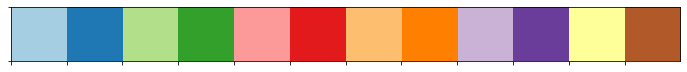

In [115]:
cols = sns.color_palette("Paired")
sns.palplot(cols)

In [136]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

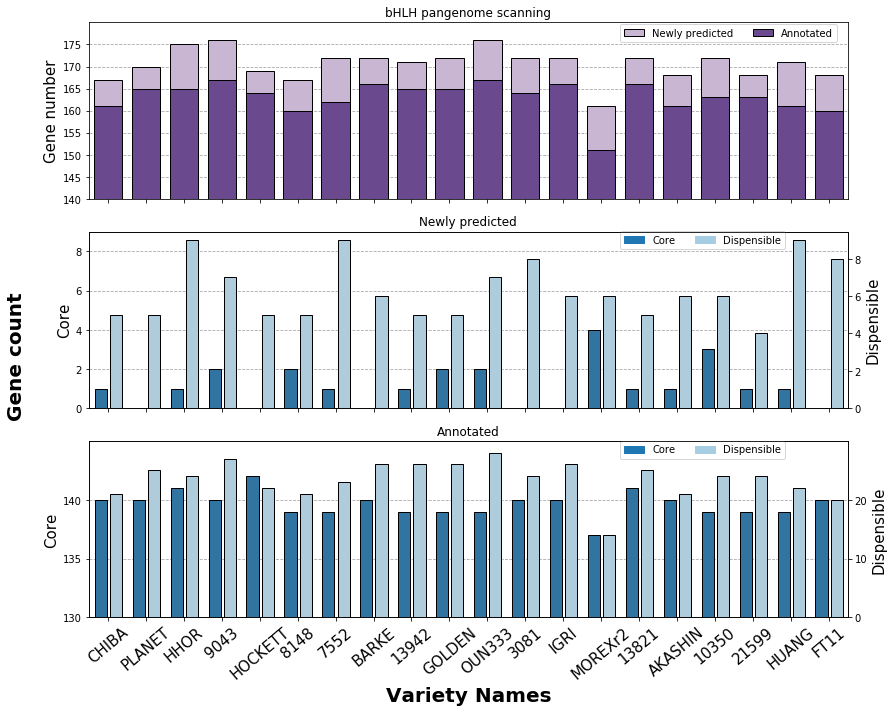

In [184]:
## new seaborn bar plot
f, axs = plt.subplots(3,1,figsize=(12, 10),facecolor='white', sharex=True)

#************************************* ax[0]   *************************
#plot total gene number
sns.barplot(ax=axs[0], x="Variety", y="Total", data=df_merged,edgecolor="black",
            label="Newly predicted", color=cols[8],zorder=2) # a trick to use total bar color to display newly annotated

#plot newly annotated
sns.barplot(ax=axs[0], x="Variety", y="Annotated", data=df_merged,edgecolor="black",
            label="Annotated", color=cols[9],zorder=3)

## change bar width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(axs[0], .75)

##add grid lines
axs[0].grid(axis="y",color="black", linestyle="--",alpha=0.35,zorder=0)

##ticks and labels
plt.xticks(rotation=40,fontsize=15)
axs[0].set_title("bHLH pangenome scanning")
axs[0].set_xlabel("",fontsize=20)
axs[0].set_ylabel("Gene number",fontsize=15)
axs[0].yaxis.set_ticks(np.arange(140,179,5))

##legend position
axs[0].legend(ncol=2, loc=(0.7,0.89), frameon=True)
axs[0].set(ylim=(140, 180))

# ***************************** ax[1] ******************************
## Core new
sns.barplot(ax=axs[1], x="Variety", y="CORE_new", data=df_merged, color=cols[1],
           edgecolor="black",zorder=3)
width_scale = 0.4
for bar in axs[1].containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + 0.05)
    bar.set_width(w * width_scale)

axs[1].set(ylim=(0, 9))

##add grid lines
axs[1].grid(axis="y",color="black", linestyle="--",alpha=0.35,zorder=0)
## ticks and labels
axs[1].yaxis.set_ticks(np.arange(0,10,2))
axs[1].set_xlabel("",fontsize=15)
axs[1].set_ylabel("Core",fontsize=15)


##legend handles
colors = {'Core':cols[1], 'Dispensible':cols[0]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
axs[1].legend(handles, labels, ncol=2, loc=(0.7,0.9), frameon=True)

## Dispensible new
ax2 = axs[1].twinx()
sns.barplot(x="Variety", y="DISP_new", data=df_merged, ax=ax2, color=cols[0],
           edgecolor="black",zorder=2)

#ax2.set_yticks(y2_ticks)

for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + 0.45)
    bar.set_width(w * width_scale)

## ticks and labels
ax2.set_title("Newly predicted")
ax2.set_ylabel("Dispensible",fontsize=15)
ax2.yaxis.set_ticks(np.arange(0,10,2)) ## or hide yaxis

# ***************************** ax[2] ******************************
## Core anno
sns.barplot(ax=axs[2], x="Variety", y="CORE_anno", data=df_merged, color=cols[1],
           edgecolor="black",zorder=3)
width_scale = 0.4
for bar in axs[2].containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + 0.05)
    bar.set_width(w * width_scale)

##add grid lines
axs[2].grid(axis="y",color="black", linestyle="--",alpha=0.35,zorder=0)
## ticks and labels
axs[2].set(ylim=(130, 145))
axs[2].yaxis.set_ticks(np.arange(130,145,5))
axs[2].set_xlabel("Variety Names",fontsize=20,fontweight="bold")
axs[2].set_ylabel("Core",fontsize=15)


##legend handles
colors = {'Core':cols[1], 'Dispensible':cols[0]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
axs[2].legend(handles, labels, ncol=2, loc=(0.7,0.9), frameon=True)

## Dispensible new
ax3 = axs[2].twinx()
sns.barplot(x="Variety", y="DISP_anno", data=df_merged, ax=ax3, color=cols[0],
           edgecolor="black",zorder=2)

#ax2.set_yticks(y2_ticks)

for bar in ax3.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + 0.45)
    bar.set_width(w * width_scale)

## ticks and labels
ax3.set(ylim=(0, 30))
ax3.yaxis.set_ticks(np.arange(0,30,10)) #
ax3.set_title("Annotated")
ax3.set_ylabel("Dispensible",fontsize=15)

f.text(-0.03, 0.5, 'Gene count', va='center', rotation='vertical',fontsize=20,fontweight='bold') 

plt.tight_layout()
plt.show()

In [185]:
f.savefig("bhlh_20pan_distribution_v2.png",dpi=300,bbox_inches = 'tight')

## retrieve domain sequence

In [11]:
import os
import pandas as pd
from Bio import SeqIO

In [43]:
DICT = {}
DomNo = 0
Spos=0
Epos=0
DomSeq = ""
DomSeq_len = 0
FullSeq = ""
CDSfullseq=''
 
input_hmm = "./Clustering/BHLH_hmmscan.output" # hmmscan domtbl output
fastafile1 = "20vars_HLH_merged_30aa_uniqid_list.fasta" # pep fasta
#fastafile2 = "hv_v2_all_cds.fasta" # cds fasta

output_pep_fullseq = "BHLH_fullseq.pep"
output_pep_domseq = "./Clustering/BHLH_domseq.pep"
output_cds_fullseq = "BHLH_fullseq.cds"

In [44]:
df = pd.read_csv(input_hmm,index_col=3,delim_whitespace=True,comment='#',header=None)
IDlist = list(df.index)
# remove duplicate in a list
IDlist1 = list(dict.fromkeys(IDlist))

In [45]:
## set dict to store relevant info
for index, row in df.iterrows():
    Spos = int(row[19])
    Epos = int(row[20])
    DomSeq_len = Epos - Spos
    DICT[index] = [DomNo, Spos, Epos, DomSeq, DomSeq_len, FullSeq, CDSfullseq] #[int(row[19]), int(row[20])]

In [46]:
# extract dom num, dom start, dom end
# for index, row in df.iterrows():
#     linelength = int(row[20]) - int(row[19])
#     if linelength >= 30:
#        DICT[index][0] += 1
#     if int(row[20]) > DICT[index][2]:
#         DICT[index][2] = int(row[20])
#     if int(row[19]) < DICT[index][1]:
#         DICT[index][1] = int(row[19])
for index, row in df.iterrows():
    linelength = int(row[20]) - int(row[19])
    if linelength > DICT[index][4]:
        DICT[index][1] = int(row[19])
        DICT[index][2] = int(row[20])
        DICT[index][4] = linelength

In [47]:
##extract pep seq
i = 0 ##presence
j = 0 ##absence
for rec in SeqIO.parse(fastafile1, "fasta"):
    if  rec.id in list(DICT.keys()):
        i+=1
        DICT[rec.id][3] = rec.seq[(DICT[rec.id][1] - 1):DICT[rec.id][2]]
        DICT[rec.id][5] = rec.seq
    else:
        j+=1

In [48]:
print(i,j)

3411 0


In [ ]:
##extract cds seq
for rec in SeqIO.parse(fastafile2, "fasta"):
    if rec.id in list(DICT.keys()):
        DICT[rec.id][5] = rec.seq

In [49]:
with open(output_pep_domseq, "w") as f2:      
    for key in list(DICT.keys()):
            #f1.write(">%s\n%s\n" % (key + "\t" + str(DICT[key][0]), DICT[key][4])) ##full pep seq
            f2.write(">%s\n%s\n" % (key + "\t" + str(DICT[key][0]), DICT[key][3])) ##pep domseq
            #f3.write(">%s\n%s\n" % (key + "\t" + str(DICT[key][0]), DICT[key][5])) ##full cds seq